In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
forex_data = pd.read_excel("GBP_IDR_Investing.xlsx")

In [4]:
forex_data.head()

,GBP_IDR Historical Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Date,Price,Open,High,Low,Vol.,Change %
1,05/30/2025,"21,927.2","21,974.4","22,011.9","21,904.4",NaN,-0.22%
2,05/29/2025,"21,975.2","21,948.3","22,005.4","21,849.0",NaN,0.16%
3,05/28/2025,"21,939.4","21,985.0","22,025.7","21,908.4",NaN,-0.18%
4,05/27/2025,"21,979.3","22,030.4","22,077.4","21,966.3",NaN,-0.22%


In [5]:
forex_data.tail()

,GBP_IDR Historical Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1409,01/07/2020,"18,210.9","18,356.9","18,373.6","18,168.6",105.90K,-0.80%
1410,01/06/2020,"18,356.9","18,206.9","18,366.7","18,193.7",95.02K,0.73%
1411,01/03/2020,"18,224.3","18,246.7","18,293.4","18,177.0",107.03K,-0.18%
1412,01/02/2020,"18,257.8","18,401.3","18,439.0","18,215.4",89.40K,-0.78%
1413,01/01/2020,"18,401.3","18,409.6","18,430.4","18,376.3",9.90K,-0.11%


In [6]:
forex_data.drop(0, axis=0)

,GBP_IDR Historical Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,05/30/2025,"21,927.2","21,974.4","22,011.9","21,904.4",NaN,-0.22%
2,05/29/2025,"21,975.2","21,948.3","22,005.4","21,849.0",NaN,0.16%
3,05/28/2025,"21,939.4","21,985.0","22,025.7","21,908.4",NaN,-0.18%
4,05/27/2025,"21,979.3","22,030.4","22,077.4","21,966.3",NaN,-0.22%
5,05/26/2025,"22,027.1","21,921.2","22,056.3","21,912.3",NaN,0.33%
...,...,...,...,...,...,...,...
1409,01/07/2020,"18,210.9","18,356.9","18,373.6","18,168.6",105.90K,-0.80%
1410,01/06/2020,"18,356.9","18,206.9","18,366.7","18,193.7",95.02K,0.73%
1411,01/03/2020,"18,224.3","18,246.7","18,293.4","18,177.0",107.03K,-0.18%
1412,01/02/2020,"18,257.8","18,401.3","18,439.0","18,215.4",89.40K,-0.78%


In [7]:
forex_data.columns

Index(['GBP_IDR Historical Data', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [8]:
forex_data = forex_data.rename(columns={'GBP_IDR Historical Data':'Date'})
forex_data = forex_data.rename(columns={'Unnamed: 1':'Close Price'})
forex_data = forex_data.rename(columns={'Unnamed: 2':'Open'})
forex_data = forex_data.rename(columns={'Unnamed: 3':'High'})
forex_data = forex_data.rename(columns={'Unnamed: 4':'Low'})
forex_data = forex_data.rename(columns={'Unnamed: 5':'Vol.'})
forex_data = forex_data.rename(columns={'Unnamed: 6':'Change %'})

In [9]:
forex_data

,Date,Close Price,Open,High,Low,Vol.,Change %
0,Date,Price,Open,High,Low,Vol.,Change %
1,05/30/2025,"21,927.2","21,974.4","22,011.9","21,904.4",NaN,-0.22%
2,05/29/2025,"21,975.2","21,948.3","22,005.4","21,849.0",NaN,0.16%
3,05/28/2025,"21,939.4","21,985.0","22,025.7","21,908.4",NaN,-0.18%
4,05/27/2025,"21,979.3","22,030.4","22,077.4","21,966.3",NaN,-0.22%
...,...,...,...,...,...,...,...
1409,01/07/2020,"18,210.9","18,356.9","18,373.6","18,168.6",105.90K,-0.80%
1410,01/06/2020,"18,356.9","18,206.9","18,366.7","18,193.7",95.02K,0.73%
1411,01/03/2020,"18,224.3","18,246.7","18,293.4","18,177.0",107.03K,-0.18%
1412,01/02/2020,"18,257.8","18,401.3","18,439.0","18,215.4",89.40K,-0.78%


In [10]:
forex_data = forex_data.drop(0, axis=0)

In [11]:
forex_data = forex_data.drop(['Open', 'High', 'Low','Vol.', 'Change %'], axis=1)

In [12]:
forex_data

,Date,Close Price
1,05/30/2025,"21,927.2"
2,05/29/2025,"21,975.2"
3,05/28/2025,"21,939.4"
4,05/27/2025,"21,979.3"
5,05/26/2025,"22,027.1"
...,...,...
1409,01/07/2020,"18,210.9"
1410,01/06/2020,"18,356.9"
1411,01/03/2020,"18,224.3"
1412,01/02/2020,"18,257.8"


In [13]:
forex_data.index = forex_data['Date']

In [14]:
forex_data

,Date,Close Price
Date,,
05/30/2025,05/30/2025,"21,927.2"
05/29/2025,05/29/2025,"21,975.2"
05/28/2025,05/28/2025,"21,939.4"
05/27/2025,05/27/2025,"21,979.3"
05/26/2025,05/26/2025,"22,027.1"
...,...,...
01/07/2020,01/07/2020,"18,210.9"
01/06/2020,01/06/2020,"18,356.9"
01/03/2020,01/03/2020,"18,224.3"


In [15]:
forex_data = forex_data.drop(['Date'], axis=1)

In [16]:
forex_data

,Close Price
Date,
05/30/2025,"21,927.2"
05/29/2025,"21,975.2"
05/28/2025,"21,939.4"
05/27/2025,"21,979.3"
05/26/2025,"22,027.1"
...,...
01/07/2020,"18,210.9"
01/06/2020,"18,356.9"
01/03/2020,"18,224.3"


In [17]:
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413 entries, 05/30/2025 to 01/01/2020
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Close Price  1413 non-null   object
dtypes: object(1)
memory usage: 22.1+ KB


In [18]:
forex_data.tail()

,Close Price
Date,
01/07/2020,"18,210.9"
01/06/2020,"18,356.9"
01/03/2020,"18,224.3"
01/02/2020,"18,257.8"
01/01/2020,"18,401.3"


### DATA INFLASI

In [19]:
month_map = {
    'Januari': 'January', 'Februari': 'February', 'Maret': 'March',
    'April': 'April', 'Mei': 'May', 'Juni': 'June',
    'Juli': 'July', 'Agustus': 'August', 'September': 'September',
    'Oktober': 'October', 'November': 'November', 'Desember': 'December'
}

In [20]:
inflasi = pd.read_excel('Data Inflasi.xlsx')
inflasi = inflasi.iloc[4:]
inflasi = inflasi.drop(columns=['Unnamed: 0', 'Unnamed: 3'])
inflasi = inflasi.rename(columns={
    'Unnamed: 1': 'Date',
    'Unnamed: 2': 'Inflasi'
})

inflasi['Inflasi'] = inflasi['Inflasi'].str.replace('%', '').astype(float)
inflasi['Date'] = inflasi['Date'].astype(str)
inflasi['Date'] = inflasi['Date'].replace(month_map, regex=True)
inflasi['Date'] = pd.to_datetime(inflasi['Date'], format="%B %Y", errors='coerce')
inflasi.dropna(subset=['Date'], inplace=True)
inflasi.set_index('Date', inplace=True)
inflasi = inflasi.sort_index()

df_data = inflasi

In [21]:
df_data.head()

,Inflasi
Date,
2020-01-01,2.68
2020-02-01,2.98
2020-03-01,2.96
2020-04-01,2.67
2020-05-01,2.19


In [22]:
df_data.tail()

,Inflasi
Date,
2025-01-01,0.76
2025-02-01,-0.09
2025-03-01,1.03
2025-04-01,1.95
2025-05-01,1.60


In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2020-01-01 to 2025-05-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Inflasi  65 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


In [24]:
df_inflasi = df_data
df_inflasi

,Inflasi
Date,
2020-01-01,2.68
2020-02-01,2.98
2020-03-01,2.96
2020-04-01,2.67
2020-05-01,2.19
...,...
2025-01-01,0.76
2025-02-01,-0.09
2025-03-01,1.03


### BI RATE (manual)

In [25]:
int_rate = pd.read_excel("BI-7Day-RR.xlsx", header=4)

In [26]:
int_rate.head()

,NO,Tanggal,BI-7Day-RR,Unnamed: 3
0,1,18 Juni 2025,5.50 %,NaN
1,2,21 Mei 2025,5.50 %,NaN
2,3,23 April 2025,5.75 %,NaN
3,4,19 Maret 2025,5.75 %,NaN
4,5,19 Februari 2025,5.75 %,NaN


In [27]:
int_rate = int_rate.drop(['NO','Unnamed: 3'],axis=1)

In [28]:
int_rate.head()

,Tanggal,BI-7Day-RR
0,18 Juni 2025,5.50 %
1,21 Mei 2025,5.50 %
2,23 April 2025,5.75 %
3,19 Maret 2025,5.75 %
4,19 Februari 2025,5.75 %


In [29]:
bulan_mapping = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

for indo, eng in bulan_mapping.items():
    int_rate['Tanggal'] = int_rate['Tanggal'].str.replace(indo, eng)

In [30]:
int_rate.rename(
    columns={
        "Tanggal": "Date",
        "BI-7Day-RR": "BI Rate",
    },
    inplace=True
)

In [31]:
int_rate['Date'] = pd.to_datetime(int_rate['Date'])

In [32]:
int_rate.head()

,Date,BI Rate
0,2025-06-18,5.50 %
1,2025-05-21,5.50 %
2,2025-04-23,5.75 %
3,2025-03-19,5.75 %
4,2025-02-19,5.75 %


In [33]:
int_rate['BI Rate'] = int_rate['BI Rate'].str.replace('%', '').astype(float)

In [34]:
int_rate = int_rate.set_index('Date')

In [35]:
int_rate.head()

,BI Rate
Date,
2025-06-18,5.50
2025-05-21,5.50
2025-04-23,5.75
2025-03-19,5.75
2025-02-19,5.75


In [36]:
int_rate = int_rate.sort_index(ascending=True)

In [37]:
int_rate.head()

,BI Rate
Date,
2016-04-21,5.50
2016-05-19,5.50
2016-06-16,5.25
2016-07-21,5.25
2016-08-19,5.25


In [38]:
int_rate = int_rate.loc['2020-01-01':'2025-05-30']

In [39]:
int_rate.head()

,BI Rate
Date,
2020-01-23,5.00
2020-02-20,4.75
2020-03-19,4.50
2020-04-14,4.50
2020-05-19,4.50


In [40]:
int_rate.tail()

,BI Rate
Date,
2025-01-15,5.75
2025-02-19,5.75
2025-03-19,5.75
2025-04-23,5.75
2025-05-21,5.50


In [41]:
# jadiin awal bulan 
int_rate.index = int_rate.index.to_period('M').to_timestamp()
int_rate.head()

,BI Rate
Date,
2020-01-01,5.00
2020-02-01,4.75
2020-03-01,4.50
2020-04-01,4.50
2020-05-01,4.50


In [42]:
int_rate

,BI Rate
Date,
2020-01-01,5.00
2020-02-01,4.75
2020-03-01,4.50
2020-04-01,4.50
2020-05-01,4.50
...,...
2025-01-01,5.75
2025-02-01,5.75
2025-03-01,5.75


### cadangan devisa

In [43]:
cad_devisa = pd.read_excel("Cadangan Devisa-BI.xlsx")
cad_devisa = cad_devisa.set_index(cad_devisa['Tanggal'])
cad_devisa = cad_devisa.drop('Tanggal', axis=1)
cad_devisa.index = cad_devisa.index.to_period('M').to_timestamp()
cad_devisa = cad_devisa.rename(columns={'Cadangan Devisa (konsep IRFCL) 4) dalam USD':'Cadangan Devisa'})
cad_devisa.head()

,Cadangan Devisa
Tanggal,
2020-01-01,131704000000
2020-02-01,130444000000
2020-03-01,120969000000
2020-04-01,127880000000
2020-05-01,130544000000


### FORWARD FILL for exogeneous var

In [44]:
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413 entries, 05/30/2025 to 01/01/2020
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Close Price  1413 non-null   object
dtypes: object(1)
memory usage: 22.1+ KB


In [45]:
df_inflasi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2020-01-01 to 2025-05-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Inflasi  65 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


In [46]:
int_rate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2020-01-01 to 2025-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BI Rate  65 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


In [47]:
inflation_daily = df_inflasi.reindex(forex_data.index, method='ffill')

In [48]:
inflation_daily

,Inflasi
Date,
05/30/2025,1.60
05/29/2025,1.60
05/28/2025,1.60
05/27/2025,1.60
05/26/2025,1.60
...,...
01/07/2020,2.68
01/06/2020,2.68
01/03/2020,2.68


In [49]:
interest_daily = int_rate.reindex(forex_data.index, method='ffill')

In [50]:
interest_daily

,BI Rate
Date,
05/30/2025,5.5
05/29/2025,5.5
05/28/2025,5.5
05/27/2025,5.5
05/26/2025,5.5
...,...
01/07/2020,5.0
01/06/2020,5.0
01/03/2020,5.0


In [51]:
devisa_daily = cad_devisa.reindex(forex_data.index, method='ffill')
devisa_daily

,Cadangan Devisa
Date,
05/30/2025,152488000000
05/29/2025,152488000000
05/28/2025,152488000000
05/27/2025,152488000000
05/26/2025,152488000000
...,...
01/07/2020,131704000000
01/06/2020,131704000000
01/03/2020,131704000000


In [52]:
df_exo = pd.merge(inflation_daily, interest_daily, left_index=True, right_index=True, how='inner')
df_exo = pd.merge(df_exo, devisa_daily, left_index=True, right_index=True, how='inner')

In [53]:
df_exo

,Inflasi,BI Rate,Cadangan Devisa
Date,,,
05/30/2025,1.60,5.5,152488000000
05/29/2025,1.60,5.5,152488000000
05/28/2025,1.60,5.5,152488000000
05/27/2025,1.60,5.5,152488000000
05/26/2025,1.60,5.5,152488000000
...,...,...,...
01/07/2020,2.68,5.0,131704000000
01/06/2020,2.68,5.0,131704000000
01/03/2020,2.68,5.0,131704000000


In [54]:
df_exo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413 entries, 05/30/2025 to 01/01/2020
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inflasi          1413 non-null   float64
 1   BI Rate          1413 non-null   float64
 2   Cadangan Devisa  1413 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 76.4+ KB


In [55]:
df_all = pd.merge(forex_data, df_exo, left_index=True, right_index=True, how='inner')

In [56]:
df_all

,Close Price,Inflasi,BI Rate,Cadangan Devisa
Date,,,,
05/30/2025,"21,927.2",1.60,5.5,152488000000
05/29/2025,"21,975.2",1.60,5.5,152488000000
05/28/2025,"21,939.4",1.60,5.5,152488000000
05/27/2025,"21,979.3",1.60,5.5,152488000000
05/26/2025,"22,027.1",1.60,5.5,152488000000
...,...,...,...,...
01/07/2020,"18,210.9",2.68,5.0,131704000000
01/06/2020,"18,356.9",2.68,5.0,131704000000
01/03/2020,"18,224.3",2.68,5.0,131704000000


In [57]:
df_all['Close Price'] = df_all['Close Price'].round(2)

In [58]:
print(type(df_all))

<class 'pandas.core.frame.DataFrame'>


In [59]:
df_all

,Close Price,Inflasi,BI Rate,Cadangan Devisa
Date,,,,
05/30/2025,"21,927.2",1.60,5.5,152488000000
05/29/2025,"21,975.2",1.60,5.5,152488000000
05/28/2025,"21,939.4",1.60,5.5,152488000000
05/27/2025,"21,979.3",1.60,5.5,152488000000
05/26/2025,"22,027.1",1.60,5.5,152488000000
...,...,...,...,...
01/07/2020,"18,210.9",2.68,5.0,131704000000
01/06/2020,"18,356.9",2.68,5.0,131704000000
01/03/2020,"18,224.3",2.68,5.0,131704000000


In [60]:
df_all['Close Price'] = (
    df_all['Close Price']
    .str.replace(',', '', regex=False)
    .astype(float))

In [61]:
df_all

,Close Price,Inflasi,BI Rate,Cadangan Devisa
Date,,,,
05/30/2025,21927.2,1.60,5.5,152488000000
05/29/2025,21975.2,1.60,5.5,152488000000
05/28/2025,21939.4,1.60,5.5,152488000000
05/27/2025,21979.3,1.60,5.5,152488000000
05/26/2025,22027.1,1.60,5.5,152488000000
...,...,...,...,...
01/07/2020,18210.9,2.68,5.0,131704000000
01/06/2020,18356.9,2.68,5.0,131704000000
01/03/2020,18224.3,2.68,5.0,131704000000


In [62]:
df_all.index = pd.to_datetime(df_all.index, errors='coerce')

In [63]:
df_all.index

DatetimeIndex(['2025-05-30', '2025-05-29', '2025-05-28', '2025-05-27',
               '2025-05-26', '2025-05-23', '2025-05-22', '2025-05-21',
               '2025-05-20', '2025-05-19',
               ...
               '2020-01-14', '2020-01-13', '2020-01-10', '2020-01-09',
               '2020-01-08', '2020-01-07', '2020-01-06', '2020-01-03',
               '2020-01-02', '2020-01-01'],
              dtype='datetime64[ns]', name='Date', length=1413, freq=None)

In [64]:
# GANTI VALUE ANOMALI
''' 
df_all.loc['2020-03-06', 'Close Price'] = 16047.30
df_all.loc['2021-03-12', 'Close Price'] = 17187.00
df_all.loc['2021-01-20', 'Close Price'] = 16969.80
df_all.loc['2021-12-02', 'Close Price'] = 16242.30
df_all.loc['2021-12-03', 'Close Price'] = 16285.10
df_all.loc['2022-08-19', 'Close Price'] = 14885.40
df_all.loc['2022-10-21', 'Close Price'] = 15411.20
'''

" \ndf_all.loc['2020-03-06', 'Close Price'] = 16047.30\ndf_all.loc['2021-03-12', 'Close Price'] = 17187.00\ndf_all.loc['2021-01-20', 'Close Price'] = 16969.80\ndf_all.loc['2021-12-02', 'Close Price'] = 16242.30\ndf_all.loc['2021-12-03', 'Close Price'] = 16285.10\ndf_all.loc['2022-08-19', 'Close Price'] = 14885.40\ndf_all.loc['2022-10-21', 'Close Price'] = 15411.20\n"

### EDA

Text(2022-09-26 00:00:00, 16066.8, 'Min: 16166.80')

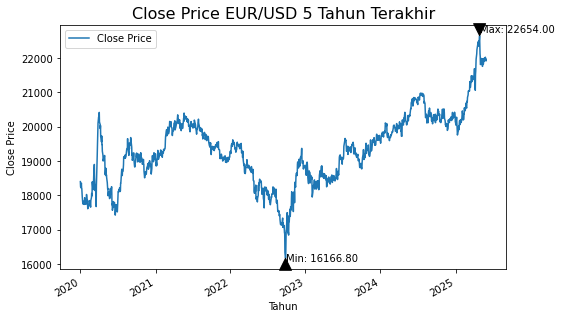

In [65]:
df_close = pd.DataFrame(df_all['Close Price'])

df_close.plot(figsize=(8,5))
plt.title('Close Price EUR/USD 5 Tahun Terakhir',fontsize=16)
plt.xlabel('Tahun')
plt.ylabel('Close Price')

max_kurs = df_close.loc[df_close['Close Price'].idxmax()]
min_kurs = df_close.loc[df_close['Close Price'].idxmin()]
plt.annotate(f'Max: {max_kurs.values[0]:.2f}',
             xy=(max_kurs.name, max_kurs.values[0]),
             xytext=(max_kurs.name, max_kurs.values[0] + 100),
             arrowprops=dict(facecolor='black', shrink=0.02))

plt.annotate(f'Min: {min_kurs.values[0]:.2f}',
             xy=(min_kurs.name, min_kurs.values[0]),
             xytext=(min_kurs.name, min_kurs.values[0] - 100),
             arrowprops=dict(facecolor='black', shrink=0.05))

In [66]:
import plotly.express as px

df_close = pd.DataFrame(df_all['Close Price']).copy()
df_close = df_close.reset_index()  
df_close.rename(columns={"index": "Date"}, inplace=True)

fig = px.line(
    df_close,
    x="Date",
    y="Close Price",
    title="Close Price EUR/IDR 5 Tahun Terakhir",
    labels={"Close Price": "Close Price", "Date": "Tahun"},
    template="plotly_white"
)
fig.update_traces(line=dict(color="blue", width=2))
fig.update_layout(
    title=dict(x=0.5, font=dict(size=20)),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    hovermode="x unified"
)

fig.show()

In [67]:
df_close.median()

Date           2022-09-15 00:00:00
Close Price                19305.8
dtype: object

In [68]:
df_all = df_all.sort_index(ascending=True)
df_all

,Close Price,Inflasi,BI Rate,Cadangan Devisa
Date,,,,
2020-01-01,18401.3,2.68,5.0,131704000000
2020-01-02,18257.8,2.68,5.0,131704000000
2020-01-03,18224.3,2.68,5.0,131704000000
2020-01-06,18356.9,2.68,5.0,131704000000
2020-01-07,18210.9,2.68,5.0,131704000000
...,...,...,...,...
2025-05-26,22027.1,1.60,5.5,152488000000
2025-05-27,21979.3,1.60,5.5,152488000000
2025-05-28,21939.4,1.60,5.5,152488000000


### UJI STASIONERITAS

In [69]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_all['Close Price'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.3812296325331375
p-value: 0.5912410576507818


p-value !< 0.05 sehingga tidak stasioner. perlu differencing pada data Close Price

In [70]:
df_all['Close Price_diff'] = df_all['Close Price'].diff()


In [71]:
result = adfuller(df_all['Close Price_diff'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -40.07398498734874
p-value: 0.0


sudah stasioner

In [72]:
df_diff = pd.DataFrame(df_all['Close Price_diff']).copy()
df_diff = df_diff.reset_index()  
df_diff.rename(columns={"index": "Date"}, inplace=True)

fig = px.line(
    df_diff,
    x="Date",
    y="Close Price_diff",
    title="Differenced Close Price EUR/IDR",
    labels={"Close Price_diff": "Differenced Close Price EUR/IDR", "Date": "Tahun"},
    template="plotly_white"
)
fig.update_traces(line=dict(color="blue", width=2))
fig.update_layout(
    title=dict(x=0.5, font=dict(size=20)),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    hovermode="x unified"
)

fig.show()

In [73]:
# uji pada exog var
result = adfuller(df_all['Inflasi'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.1410155936044677
p-value: 0.6984414182729469


stasioner

In [74]:
result = adfuller(df_all['BI Rate'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.076369828490772
p-value: 0.7244027749640407


tidak stasioner

In [75]:
df_all['BI Rate_diff'] = df_all['BI Rate'].diff()

In [76]:
result = adfuller(df_all['BI Rate_diff'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -4.188020769589438
p-value: 0.0006903497219719902


In [77]:
df_diff = pd.DataFrame(df_all['BI Rate_diff']).copy()
df_diff = df_diff.reset_index()  
df_diff.rename(columns={"index": "Date"}, inplace=True)

fig = px.line(
    df_diff,
    x="Date",
    y="BI Rate_diff",
    title="Differenced Cadangan Devisa",
    labels={"Close Price": "Differenced Cadangan Devisa", "Date": "Tahun"},
    template="plotly_white"
)
fig.update_traces(line=dict(color="blue", width=2))
fig.update_layout(
    title=dict(x=0.5, font=dict(size=20)),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    hovermode="x unified"
)

fig.show()

sdh menjadi stasioner

### MENENTUKAN PARAMETER P, Q dengan ACF & PACF

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



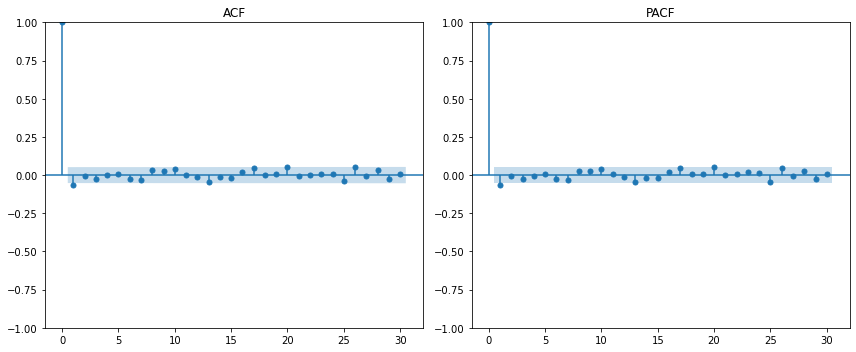

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df_all['Close Price_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("ACF")

plt.subplot(1, 2, 2)
plot_pacf(df_all['Close Price_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("PACF")
plt.tight_layout()
plt.show()

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



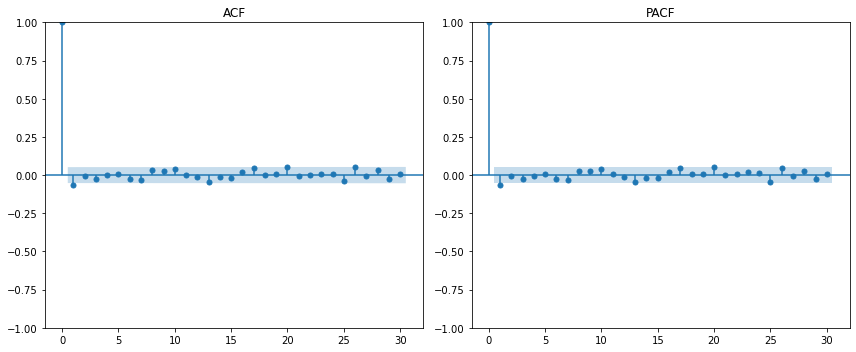

In [79]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df_all['Close Price_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("ACF")

plt.subplot(1, 2, 2)
plot_pacf(df_all['Close Price_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("PACF")
plt.tight_layout()
plt.show()

dari sini hasilnya 1 untuk p & q karena tajam di lag ke 1. tp mau coba pake grid search AIC

In [80]:
df_all

,Close Price,Inflasi,BI Rate,Cadangan Devisa,Close Price_diff,BI Rate_diff
Date,,,,,,
2020-01-01,18401.3,2.68,5.0,131704000000,NaN,NaN
2020-01-02,18257.8,2.68,5.0,131704000000,-143.5,0.0
2020-01-03,18224.3,2.68,5.0,131704000000,-33.5,0.0
2020-01-06,18356.9,2.68,5.0,131704000000,132.6,0.0
2020-01-07,18210.9,2.68,5.0,131704000000,-146.0,0.0
...,...,...,...,...,...,...
2025-05-26,22027.1,1.60,5.5,152488000000,72.7,0.0
2025-05-27,21979.3,1.60,5.5,152488000000,-47.8,0.0
2025-05-28,21939.4,1.60,5.5,152488000000,-39.9,0.0


## Model Experiment

best model

22/5 -> 1,1,2

22/1 -> 1,1,1

In [92]:
window_size = 22
horizon = 1

X = []
y = []

data = df_all[['Close Price', 'Inflasi', 'BI Rate', 'Cadangan Devisa']]

for i in range(len(data) - window_size - horizon + 1):
    window = data.iloc[i : i + window_size]
    target = data.iloc[i + window_size : i + window_size + horizon]['Close Price'].values
    X.append(window.values)
    y.append(target)

X = np.array(X)  
y = np.array(y) 

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [93]:
X_train.shape

(1112, 22, 4)

In [94]:
X_test.shape

(279, 22, 4)

In [95]:
y_train.shape

(1112, 1)

In [96]:
# Walk-forward ARIMAX 
import statsmodels.api as sm 

history_X = list(X_train)
history_y = list(y_train)

predictions = []

for t in range(len(X_test)):
    current_window = X_test[t]
    endog = current_window[:, 0]        
    exog = current_window[:, 1:]   

    # Use last exog row and repeat for future horizon
    future_exog = np.repeat([exog[-1]], horizon, axis=0)

    try:
        model = sm.tsa.ARIMA(endog=endog, exog=exog, order=(1, 1, 1)) # awalnya: 5, 1, 0
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=horizon, exog=future_exog)
        predictions.append(forecast)
      #  print(f'Predicted: {forecast}, Expected: {y_test[t]}')
    except Exception as e:
      #  print(f"Error at step {t}: {e}")
        predictions.append(np.full(horizon, np.nan))

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita

In [97]:
# eval
from sklearn.metrics import mean_absolute_percentage_error

y_true_valid = []
y_pred_valid = []

for true, pred in zip(y_test, predictions):
    if not np.isnan(pred).any():
        y_true_valid.append(true)
        y_pred_valid.append(pred)

y_true_valid = np.array(y_true_valid)
y_pred_valid = np.array(y_pred_valid)

y_true_flat = y_true_valid.flatten()
y_pred_flat = y_pred_valid.flatten()

mae = mean_absolute_error(y_true_flat, y_pred_flat)
rmse = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))
mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)

print(f"Final MAE: {mae:.3f}")
print(f"Final RMSE: {rmse:.3f}")
print(f"Final MAPEE: {mape:.5f}")

Final MAE: 86.182
Final RMSE: 113.621
Final MAPEE: 0.00415


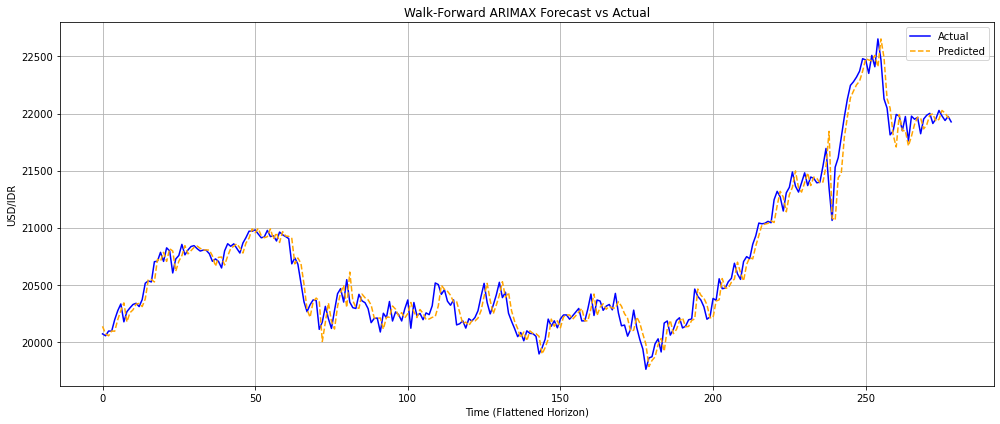

In [98]:
plt.figure(figsize=(14, 6))
plt.plot(y_true_flat, label='Actual', color='blue')
plt.plot(y_pred_flat, label='Predicted', color='orange', linestyle='--')
plt.title('Walk-Forward ARIMAX Forecast vs Actual')
plt.xlabel('Time (Flattened Horizon)')
plt.ylabel('USD/IDR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
forecast

array([21983.94585166])

In [100]:
import pickle as pkl

filename = "gbp_22_1_111.pkl"
pkl.dump(model_fit, open(filename, "wb"))